In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import timedelta, date

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
Base = automap_base()

In [7]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)
# reflect the tables

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
#display table column and first row in dictionary format 
Measurement_first_row = session.query(Measurement).first()
Measurement_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f7f22061820>,
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [12]:
Station_first_row = session.query(Station).first()
Station_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f7f2206e040>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [14]:
# Design a queryhttp://localhost:8888/notebooks/climate_starter.ipynb# to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [15]:
# find the earliest date in the dataset 
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [16]:
#find the latest date or last day of data on the table 
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [17]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(f"The date one year ago from the lastest date is {year_ago}")

The date one year ago from the lastest date is 2016-08-23


In [18]:
#define the last 12 months date 
year_ago = dt.date(2016, 8, 23)

In [19]:
#Design a query to retrieve the last 12 months of precipitation data
prcp_last12 = session.query(Measurement.date, func.avg(Measurement.prcp)).filter(Measurement.date >= year_ago)\
.group_by(Measurement.date).all()
prcp_last12 

[('2016-08-23', 0.45166666666666666),
 ('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 

In [20]:
#craete dataframe with the last 12 months precipitation data 
prcp_last12_df = pd.DataFrame(prcp_last12, columns=["date","precipitation"])
prcp_last12_df.head()

,date,precipitation
0,2016-08-23,0.451667
1,2016-08-24,1.555000
2,2016-08-25,0.077143
3,2016-08-26,0.016667
4,2016-08-27,0.064000


In [21]:
#set date to index
prcp_last12_df.set_index('date', inplace=True)
prcp_last12_df.head()

,precipitation
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000


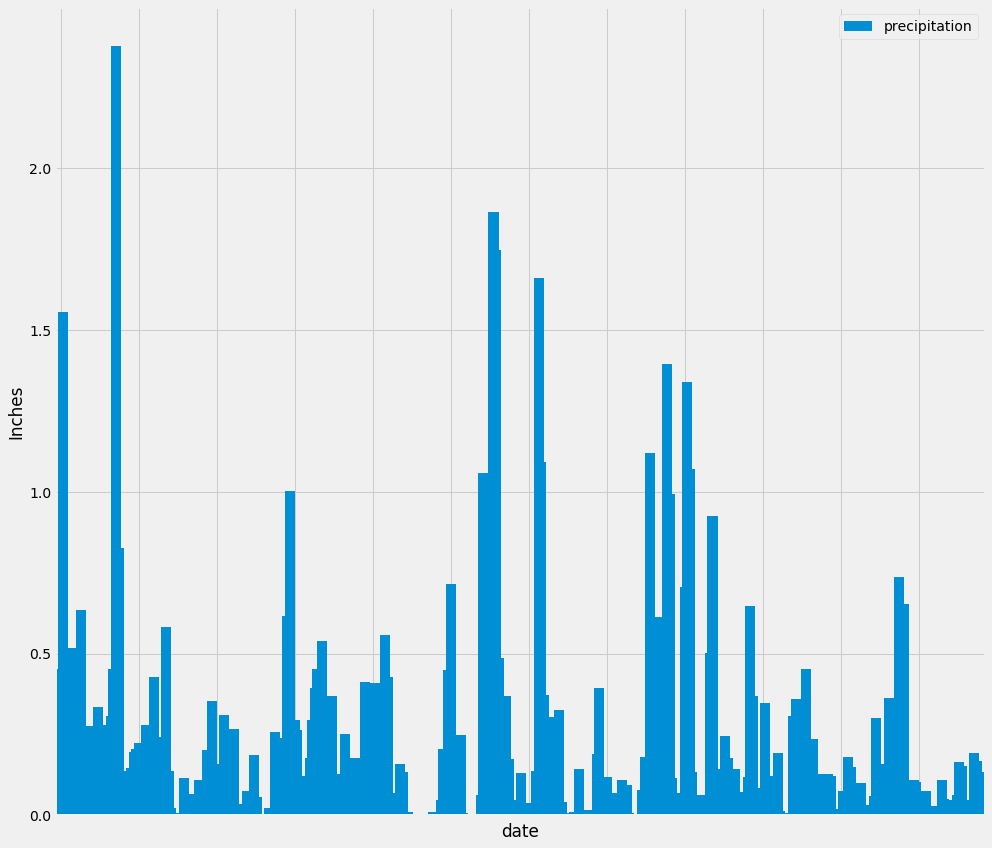

In [22]:
# Plot the results using Dataframe plot method  
ax = prcp_last12_df.plot(kind="bar", width=4, figsize=(14,12))
plt.locator_params(axis="x", nbins=12)
plt.ylabel("Inches")
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.tight_layout()
plt.savefig("Images/Last12MonthsPrcp.png")
plt.show()

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
average_prcp = round(prcp_last12_df["precipitation"].mean(),3)
print(f"The average precipitaion in the last 12 months is {average_prcp}inches")

The average precipitaion in the last 12 months is 0.171inches


In [24]:
median_prcp = prcp_last12_df["precipitation"].median()
print(f"The median precipitaion in the last 12 months is {median_prcp}inches")

The median precipitaion in the last 12 months is 0.07inches


In [25]:
mode_prcp = prcp_last12_df["precipitation"].mode()
print(f"The mode of the precipitaion data in the last 12 months are {mode_prcp}")

The mode of the precipitaion data in the last 12 months are 0    0.0
dtype: float64


In [26]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station.id).count()
print(stations)

9


In [27]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Active_locations = session.query(Measurement.station, func.count(Measurement.station)).\
                   group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(Active_locations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


The most active station is USC00519281 with 2772 observations

In [28]:
MostActive_StationId = list(np.ravel(session.query(Station.id).filter(Station.station == "USC00519281").all()))
MostActive_StationId

[7]

In [29]:
Most_Act_Station_Name = Active_locations[0][0]
Most_Act_Station_Name

'USC00519281'

In [30]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
Most_Active_station_tobs = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
                                    func.avg(Measurement.tobs)).filter(Measurement.station==Station.station).\
                                    filter(Station.id == "7").all()
print(Most_Active_station_tobs)

[(54.0, 85.0, 71.66378066378067)]


In [31]:
# alternative with station name
Most_Active_station_tobs2 = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
                                    func.avg(Measurement.tobs)).\
                      filter(Measurement.station == Most_Act_Station_Name).all()
Most_Active_station_tobs2

[(54.0, 85.0, 71.66378066378067)]

In [32]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
HighTobs_Station = session.query(Measurement.station, Measurement.tobs, func.count(Measurement.tobs)).\
                   group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
HighTobs_Station

[('USC00519281', 70.0, 2772),
 ('USC00519397', 65.0, 2724),
 ('USC00513117', 67.0, 2709),
 ('USC00519523', 75.0, 2669),
 ('USC00516128', 73.0, 2612),
 ('USC00514830', 67.0, 2202),
 ('USC00511918', 66.0, 1979),
 ('USC00517948', 75.0, 1372),
 ('USC00518838', 72.0, 511)]

In [33]:
#define station with the hihest observations
TobsObs_HighSta = HighTobs_Station[0][0]
TobsObs_HighSta

'USC00519281'

In [34]:
#query for last 12 months of temperature from station with the highest observations
tobs_last12 = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == TobsObs_HighSta)\
.filter(Measurement.date >= year_ago).all()
tobs_last12 

[('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281',

In [35]:
#pass the output of query into a dataframe
HighTobs_Station_df = pd.DataFrame(tobs_last12, columns=["Station","TOBS"])
HighTobs_Station_df

,Station,TOBS
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0
...,...,...
347,USC00519281,77.0
348,USC00519281,77.0
349,USC00519281,76.0
350,USC00519281,76.0


<function matplotlib.pyplot.show(*args, **kw)>

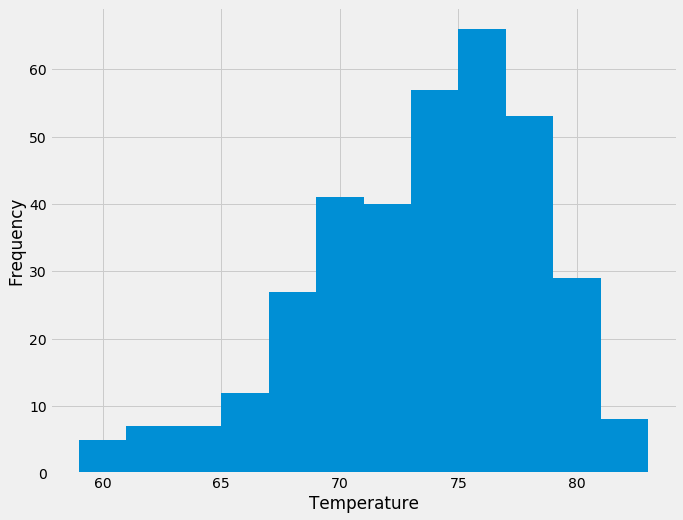

In [36]:
#Plot histogram 
HighTobs_Station_df["TOBS"].plot.hist(grid=True, bins=12, figsize=(10,8))
plt.xlabel("Temperature")
plt.savefig("Images/12MonthsTobs.png")
plt.show

## Bonus Challenge Assignment

In [37]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [38]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_start_date = dt.date(2016, 7, 4)
trip_end_date = dt.date(2016, 7, 14)
trip_avg = calc_temps(trip_start_date, trip_end_date)
trip_avg

[(71.0, 77.0, 82.0)]

In [39]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

In [40]:
#create "Trip Avg Temp" dataframe for bar chart 
trip_avg_df = pd.DataFrame(trip_avg, columns=["tmin", "tavg", "tmax"])
trip_avg_df

,tmin,tavg,tmax
0,71.0,77.0,82.0


Text(0.5, 1.0, 'Trip Avg Temp')

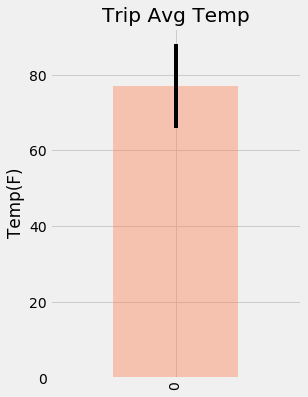

In [41]:
#craete bar chart for "Trip Avg Temp"
error = trip_avg_df.iloc[0,2] - trip_avg_df.iloc[0,0]
tavg = trip_avg_df["tavg"]
tavg.plot(kind='bar', yerr=error, figsize=(4,6), alpha=0.4, color='coral')
plt.ylabel("Temp(F)")
plt.title("Trip Avg Temp")

In [42]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel = [ Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation, \
       func.sum(Measurement.prcp)]
my_trip_prcp = session.query(*sel).filter(Measurement.station==Station.station).\
               filter(Measurement.date >=trip_start_date)\
              .filter(Measurement.date <= trip_end_date).group_by(Measurement.station)\
               .order_by(func.sum(Measurement.prcp).desc()).all()
my_trip_prcp

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  5.869999999999999),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  3.13),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.55),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  1.02),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.72),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.11),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]

In [43]:
my_trip_prcp_df = pd.DataFrame(my_trip_prcp, columns=["Station","Station Name","Lat","Long","Elevation","Tot Prcp"])
my_trip_prcp_df

,Station,Station Name,Lat,Long,Elevation,Tot Prcp
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,5.87
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,3.13
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,1.55
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,1.02
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.72
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.11
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,NaN


In [44]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [45]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [46]:
#Get the range of dates and parse out just the month amd days 
tripdates = pd.date_range(trip_start_date, trip_end_date+timedelta(days=0),freq="d")
Mytripdates = tripdates.strftime("%m-%d")
Mytripdates

Index(['07-04', '07-05', '07-06', '07-07', '07-08', '07-09', '07-10', '07-11',
       '07-12', '07-13', '07-14'],
      dtype='object')

In [47]:
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for date in Mytripdates:
    normals.append(daily_normals(date))
normals

[[(70.0, 76.57142857142857, 81.0)],
 [(66.0, 75.0, 81.0)],
 [(69.0, 75.0, 81.0)],
 [(69.0, 74.91071428571429, 82.0)],
 [(69.0, 76.08333333333333, 83.0)],
 [(68.0, 76.19298245614036, 83.0)],
 [(68.0, 75.62068965517241, 82.0)],
 [(70.0, 75.78947368421052, 81.0)],
 [(67.0, 75.96491228070175, 82.0)],
 [(69.0, 76.1896551724138, 81.0)],
 [(61.0, 76.2280701754386, 82.0)]]

In [48]:
#unpack the nested list into list of tuples
normals1 = []
for x in normals:
    for y in x:
        normals1.append(y)
normals1

[(70.0, 76.57142857142857, 81.0),
 (66.0, 75.0, 81.0),
 (69.0, 75.0, 81.0),
 (69.0, 74.91071428571429, 82.0),
 (69.0, 76.08333333333333, 83.0),
 (68.0, 76.19298245614036, 83.0),
 (68.0, 75.62068965517241, 82.0),
 (70.0, 75.78947368421052, 81.0),
 (67.0, 75.96491228070175, 82.0),
 (69.0, 76.1896551724138, 81.0),
 (61.0, 76.2280701754386, 82.0)]

In [49]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals1_df = pd.DataFrame(normals1, columns=["tmin","tavg","tmax"])
normals1_df["date"] = tripdates
normals1_df

,tmin,tavg,tmax,date
0,70.0,76.571429,81.0,2016-07-04
1,66.0,75.000000,81.0,2016-07-05
2,69.0,75.000000,81.0,2016-07-06
3,69.0,74.910714,82.0,2016-07-07
4,69.0,76.083333,83.0,2016-07-08
5,68.0,76.192982,83.0,2016-07-09
6,68.0,75.620690,82.0,2016-07-10
7,70.0,75.789474,81.0,2016-07-11
8,67.0,75.964912,82.0,2016-07-12
9,69.0,76.189655,81.0,2016-07-13


In [50]:
#set the date as index
normals1_df.set_index('date', inplace=True)
normals1_df.head()

,tmin,tavg,tmax
date,,,
2016-07-04,70.0,76.571429,81.0
2016-07-05,66.0,75.000000,81.0
2016-07-06,69.0,75.000000,81.0
2016-07-07,69.0,74.910714,82.0
2016-07-08,69.0,76.083333,83.0


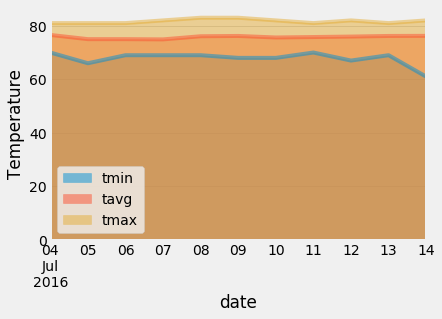

In [51]:
# Plot the daily normals as an area plot with `stacked=False`
ax = normals1_df.plot.area(stacked=False)
plt.ylabel("Temperature")
plt.savefig("Images/TempAreaPlot.png")
plt.show()